# Telco Churn Draft Notebook

In [1]:
# Importing neccessary libraries and modules
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from acquire import get_telco_data, summarize_df
from prepare import num_distributions, prep_telco
import graphviz
from graphviz import Graph
import warnings
warnings.filterwarnings('ignore')
import explore

## Acquisition
- Acquire uncleaned `telco_churn` dataset
- Garner basic understanding of dataset using functions from `acquire.py` such as shape, info, describe, etc.
- Create basic distributions of numeric columns

In [2]:
# Pull df from acquire.py and look at the first few entries using df.head()
unclean_telco = get_telco_data()
unclean_telco.head(10).T

,0,1,2,3,4,5,6,7,8,9
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female
senior_citizen,0,0,0,1,1,0,1,0,1,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes
tenure,9,9,4,13,3,9,71,63,7,65
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No,No,No,Yes,No,Yes
internet_service_type_id,1,1,2,2,2,1,2,2,1,1
online_security,No,No,No,No,No,No,Yes,Yes,Yes,Yes


In [3]:
# High level summary of data including value_counts, dtypes, 
summarize_df(unclean_telco)

This dataframe has 7043 rows and 21 columns.
------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   objec

#### Pre-cleaning extrapolations
- Lots of variables need encoding and renaming
- Unneccesary columns such as `customer_id`
- See <a href="https://github.com/Marley-C-Robinson-99/Classification-Project#readme">README.md</a> for data dictionary that explains each variable
- Non-normal distributions for numeric categories.

# Preparation
- Clean data using the <a href="https://github.com/Marley-C-Robinson-99/Classification-Project/blob/main/prepare.py">prepare.py</a> functions `prep_telco()`
    - Renamed columns to increase understandability
    - Removed duplicates and entries with empty(null) total_charges
    - Created dummies for `internet_service_type_id`, `payment_type_id`, and `contract_type_id`
    - Created features `fbr_multi_line` and `auto_bill`
- Look at distributions of variables
- Split data into train, validate, and test sets

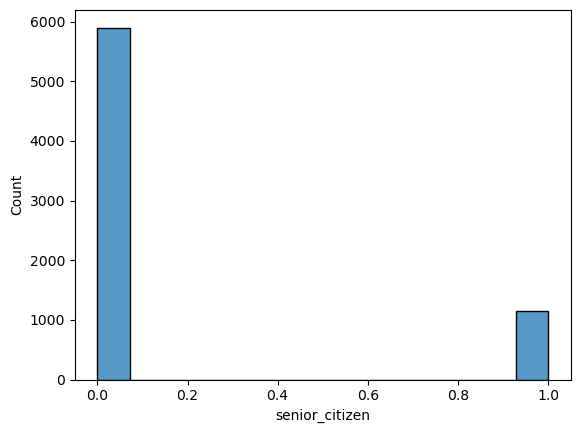

0    5901
1    1142
Name: senior_citizen, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


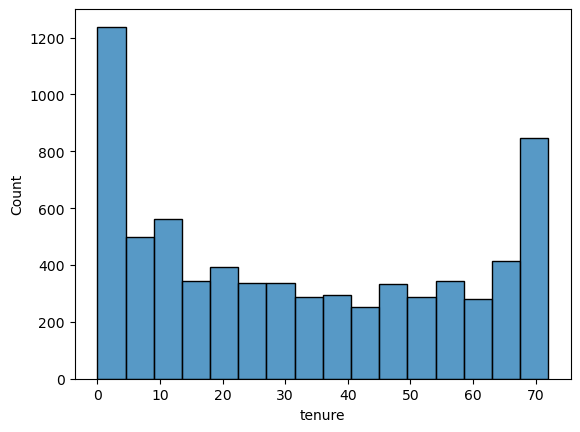

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


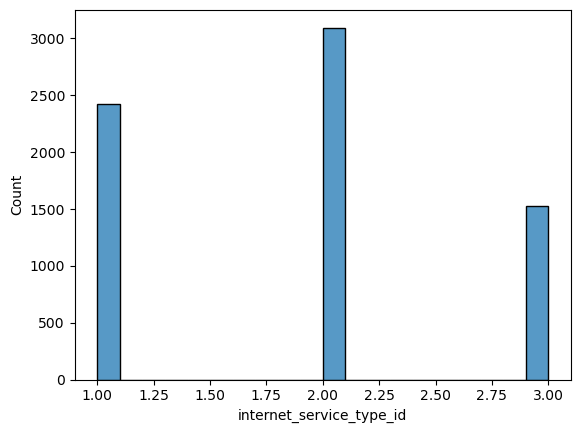

2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


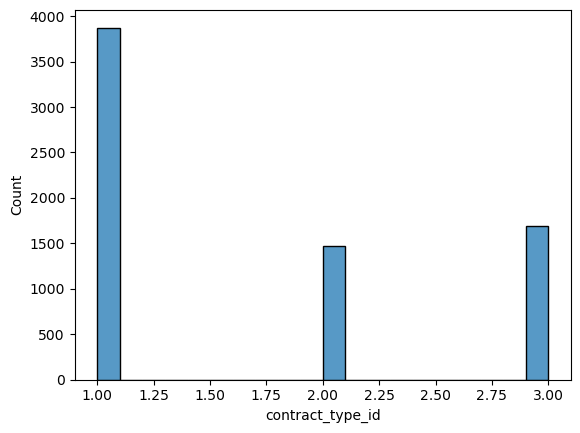

1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


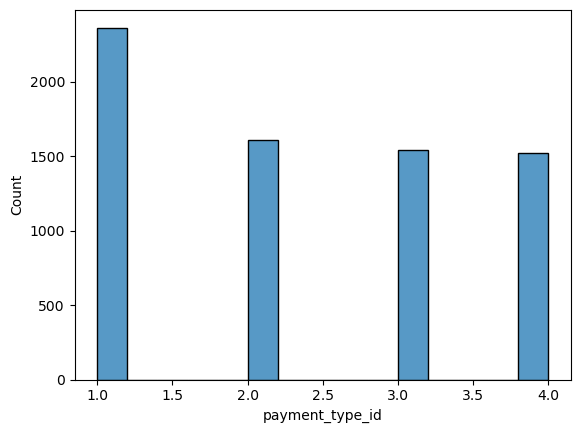

1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


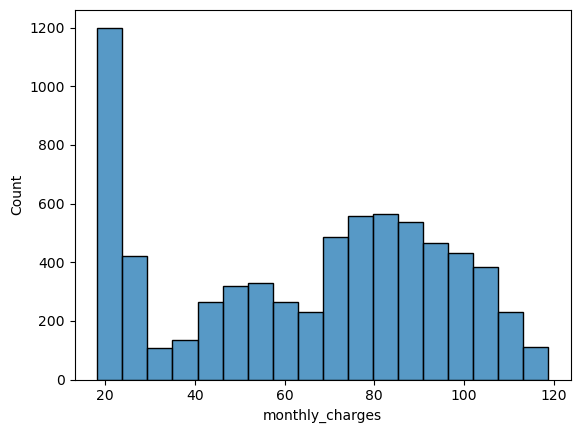

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
116.55     1
106.85     1
68.55      1
108.80     1
67.85      1
Name: monthly_charges, Length: 1585, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


In [4]:
for col, vals in unclean_telco.iteritems():
    if unclean_telco[f'{col}'].dtype != object:
        print(unclean_telco[f'{col}'].value_counts(), sns.histplot(data = unclean_telco[f'{col}']), plt.show(),
              end = '\n------------------------------------\n')

In [5]:
train, validate, test = prep_telco(get_telco_data())
train.shape, validate.shape, test.shape

((3937, 29), (1688, 29), (1407, 29))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5919 to 4192
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   is_male            3937 non-null   int64  
 1   is_senior          3937 non-null   int64  
 2   has_partner        3937 non-null   int64  
 3   has_dependents     3937 non-null   int64  
 4   tenure             3937 non-null   int64  
 5   has_phone          3937 non-null   int64  
 6   has_multi_line     3937 non-null   int64  
 7   has_onl_sec        3937 non-null   int64  
 8   has_backup         3937 non-null   int64  
 9   has_dev_pro        3937 non-null   int64  
 10  has_tech_supp      3937 non-null   int64  
 11  has_tv_strm        3937 non-null   int64  
 12  has_mv_strm        3937 non-null   int64  
 13  has_pprless_bill   3937 non-null   int64  
 14  monthly_charges    3937 non-null   float64
 15  total_charges      3937 non-null   float64
 16  has_churned        39

In [7]:
train.head().T

,5919,1915,5054,2355,6279
is_male,0.0,1.00,0.00,1.0,1.0
is_senior,0.0,0.00,0.00,0.0,1.0
has_partner,0.0,0.00,1.00,1.0,0.0
has_dependents,0.0,1.00,1.00,1.0,0.0
tenure,58.0,71.00,35.00,1.0,20.0
has_phone,1.0,1.00,1.00,1.0,1.0
has_multi_line,1.0,1.00,1.00,0.0,0.0
has_onl_sec,1.0,1.00,0.00,0.0,1.0
has_backup,1.0,1.00,0.00,0.0,0.0
has_dev_pro,1.0,0.00,0.00,0.0,0.0


# Exploration
- Run statistical tests to evaluate any potential correllations
    - Form hypotheses based upon statistical data
- Utilize visualization to 

## Univariate Stat Tests

In [8]:
# Listing columns to separate quantitative vars from categorical vars
train.columns

Index(['is_male', 'is_senior', 'has_partner', 'has_dependents', 'tenure',
       'has_phone', 'has_multi_line', 'has_onl_sec', 'has_backup',
       'has_dev_pro', 'has_tech_supp', 'has_tv_strm', 'has_mv_strm',
       'has_pprless_bill', 'monthly_charges', 'total_charges', 'has_churned',
       'payment_bank', 'payment_card', 'payment_e_check', 'payment_m_check',
       'internet_dsl', 'internet_fiber', 'internet_none', 'contract_m_to_m',
       'contract_one_year', 'contract_two_year', 'auto_bill',
       'fbr_multi_line'],
      dtype='object')

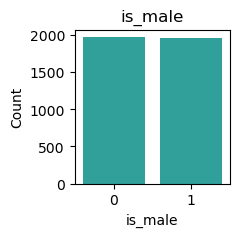

   is_male  Count  Percent
1        0   1976    50.19
0        1   1961    49.81
_________________________________________________________________


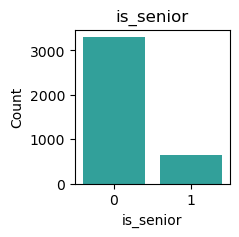

   is_senior  Count  Percent
0          0   3302    83.87
1          1    635    16.13
_________________________________________________________________


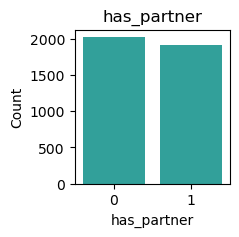

   has_partner  Count  Percent
0            0   2027    51.49
1            1   1910    48.51
_________________________________________________________________


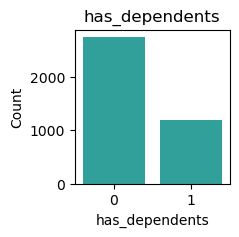

   has_dependents  Count  Percent
0               0   2745    69.72
1               1   1192    30.28
_________________________________________________________________


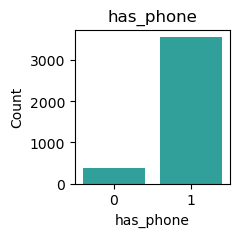

   has_phone  Count  Percent
1          1   3564    90.53
0          0    373     9.47
_________________________________________________________________


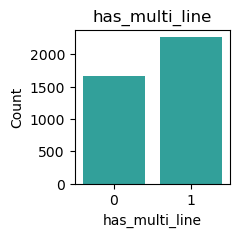

   has_multi_line  Count  Percent
0               1   2268    57.61
1               0   1669    42.39
_________________________________________________________________


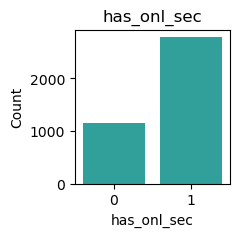

   has_onl_sec  Count  Percent
0            1   2785    70.74
1            0   1152    29.26
_________________________________________________________________


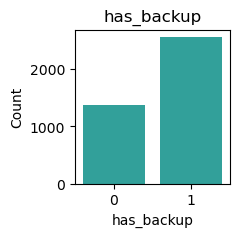

   has_backup  Count  Percent
0           1   2564    65.13
1           0   1373    34.87
_________________________________________________________________


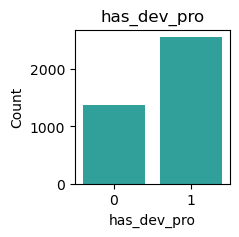

   has_dev_pro  Count  Percent
0            1   2560    65.02
1            0   1377    34.98
_________________________________________________________________


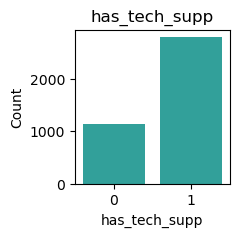

   has_tech_supp  Count  Percent
0              1   2798    71.07
1              0   1139    28.93
_________________________________________________________________


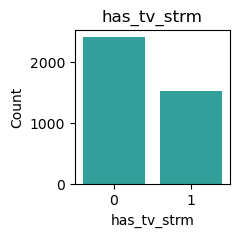

   has_tv_strm  Count  Percent
0            0   2416    61.37
1            1   1521    38.63
_________________________________________________________________


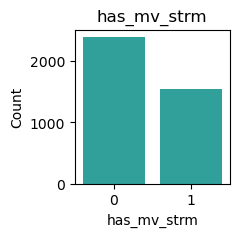

   has_mv_strm  Count  Percent
0            0   2396    60.86
1            1   1541    39.14
_________________________________________________________________


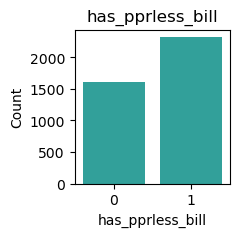

   has_pprless_bill  Count  Percent
1                 1   2324    59.03
0                 0   1613    40.97
_________________________________________________________________


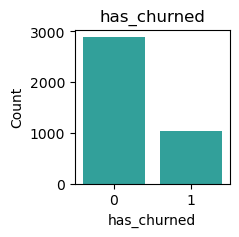

   has_churned  Count  Percent
0            0   2891    73.43
1            1   1046    26.57
_________________________________________________________________


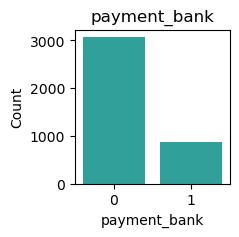

   payment_bank  Count  Percent
0             0   3075    78.11
1             1    862    21.89
_________________________________________________________________


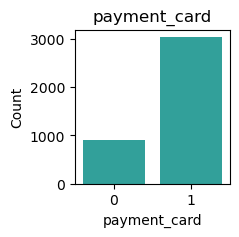

   payment_card  Count  Percent
0             1   3042    77.27
1             0    895    22.73
_________________________________________________________________


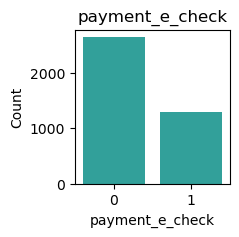

   payment_e_check  Count  Percent
0                0   2648    67.26
1                1   1289    32.74
_________________________________________________________________


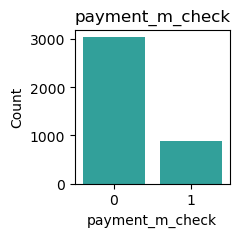

   payment_m_check  Count  Percent
0                0   3046    77.37
1                1    891    22.63
_________________________________________________________________


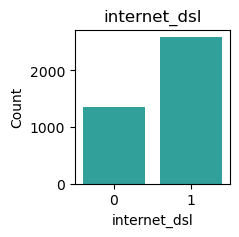

   internet_dsl  Count  Percent
0             1   2589    65.76
1             0   1348    34.24
_________________________________________________________________


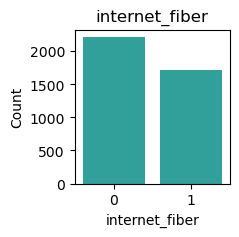

   internet_fiber  Count  Percent
0               0   2215    56.26
1               1   1722    43.74
_________________________________________________________________


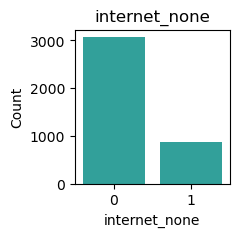

   internet_none  Count  Percent
0              0   3070    77.98
1              1    867    22.02
_________________________________________________________________


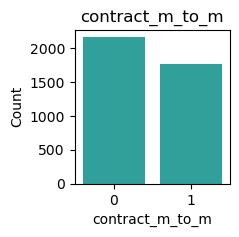

   contract_m_to_m  Count  Percent
1                0   2165    54.99
0                1   1772    45.01
_________________________________________________________________


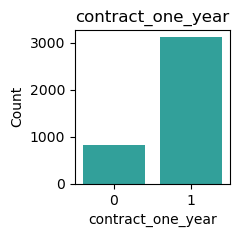

   contract_one_year  Count  Percent
0                  1   3122     79.3
1                  0    815     20.7
_________________________________________________________________


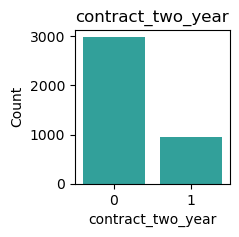

   contract_two_year  Count  Percent
0                  0   2980    75.69
1                  1    957    24.31
_________________________________________________________________


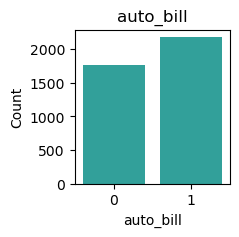

   auto_bill  Count  Percent
0          1   2180    55.37
1          0   1757    44.63
_________________________________________________________________


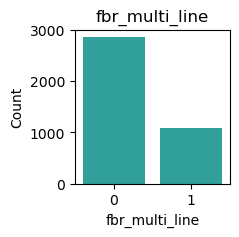

   fbr_multi_line  Count  Percent
0               0   2860    72.64
1               1   1077    27.36
_________________________________________________________________


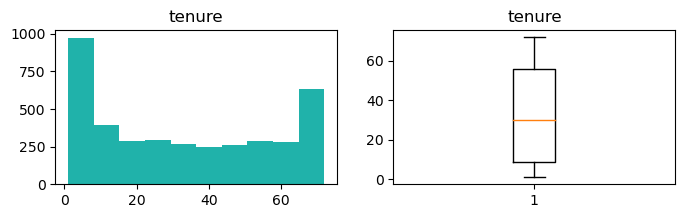

count    3937.000000
mean       32.775210
std        24.709604
min         1.000000
25%         9.000000
50%        30.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


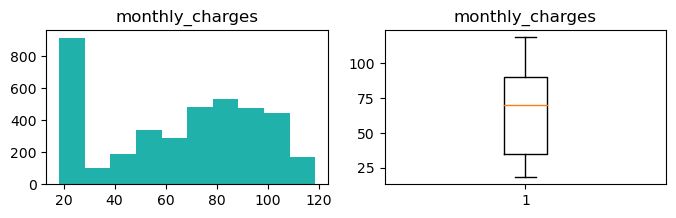

count    3937.000000
mean       64.805131
std        30.294804
min        18.250000
25%        34.700000
50%        70.250000
75%        90.300000
max       118.650000
Name: monthly_charges, dtype: float64


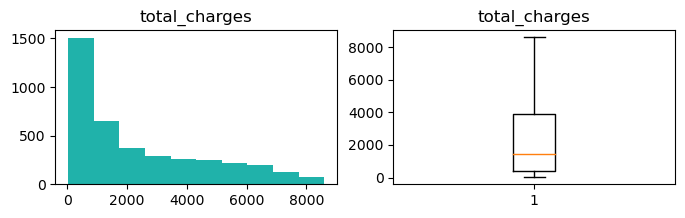

count    3937.000000
mean     2316.775641
std      2284.984394
min        18.850000
25%       396.100000
50%      1414.800000
75%      3893.600000
max      8594.400000
Name: total_charges, dtype: float64


In [9]:
# Seperating vars and running stat tests
cat_vars = ['is_male', 'is_senior', 'has_partner', 'has_dependents', 'has_phone', 'has_multi_line', 'has_onl_sec', 'has_backup',
       'has_dev_pro', 'has_tech_supp', 'has_tv_strm', 'has_mv_strm','has_pprless_bill','has_churned',
       'payment_bank', 'payment_card', 'payment_e_check', 'payment_m_check',
       'internet_dsl', 'internet_fiber', 'internet_none', 'contract_m_to_m',
       'contract_one_year', 'contract_two_year', 'auto_bill',
       'fbr_multi_line']

quant_vars = ['tenure','monthly_charges', 'total_charges']

explore.explore_univariate(train, cat_vars, quant_vars)

#### Univariate Stat Test Takeaways
- 26.6% Have churned
    - Baseline will be based upon customers not churning
- Mean monthly charge is 64.8
- Mean total charge is 2316.8
- Month-to-month customers have the highest share of contracts (45%)
- 43% of customers have a fiber internet plan

## Bivariate Stat Test

is_male 
_____________________

       chi2  p-value  degrees of freedom
0  0.001264  0.97164                   1

observed:
 has_churned     0     1   All
is_male                      
0            1440   521  1961
1            1451   525  1976
All          2891  1046  3937

expected:
              0           1
0  1439.992634  521.007366
1  1451.007366  524.992634


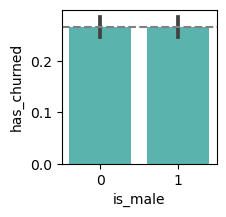


_____________________

is_senior 
_____________________

       chi2       p-value  degrees of freedom
0  99.71917  1.756132e-23                   1

observed:
 has_churned     0     1   All
is_senior                    
0            2527   775  3302
1             364   271   635
All          2891  1046  3937

expected:
              0           1
0  2424.709677  877.290323
1   466.290323  168.709677


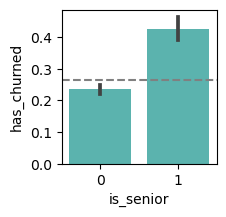


_____________________

has_partner 
_____________________

        chi2       p-value  degrees of freedom
0  80.089329  3.578599e-19                   1

observed:
 has_churned     0     1   All
has_partner                  
0            1364   663  2027
1            1527   383  1910
All          2891  1046  3937

expected:
              0           1
0  1488.457455  538.542545
1  1402.542545  507.457455


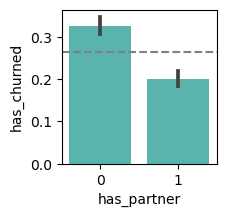


_____________________

has_dependents 
_____________________

         chi2       p-value  degrees of freedom
0  104.542502  1.538574e-24                   1

observed:
 has_churned        0     1   All
has_dependents                  
0               1885   860  2745
1               1006   186  1192
All             2891  1046  3937

expected:
              0           1
0  2015.695961  729.304039
1   875.304039  316.695961


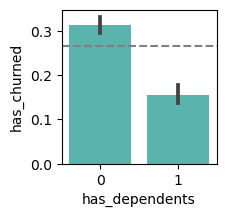


_____________________

has_phone 
_____________________

       chi2   p-value  degrees of freedom
0  0.876869  0.349061                   1

observed:
 has_churned     0     1   All
has_phone                    
0             282    91   373
1            2609   955  3564
All          2891  1046  3937

expected:
             0          1
0   273.89967   99.10033
1  2617.10033  946.89967


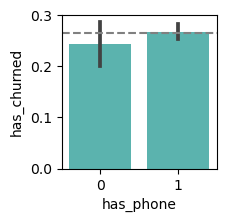


_____________________

has_multi_line 
_____________________

        chi2   p-value  degrees of freedom
0  10.830305  0.000999                   1

observed:
 has_churned        0     1   All
has_multi_line                  
0               1711   557  2268
1               1180   489  1669
All             2891  1046  3937

expected:
              0           1
0  1665.427483  602.572517
1  1225.572517  443.427483


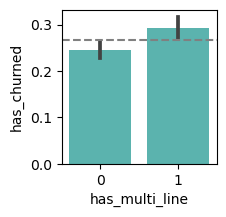


_____________________

has_onl_sec 
_____________________

         chi2       p-value  degrees of freedom
0  127.845792  1.213117e-29                   1

observed:
 has_churned     0     1   All
has_onl_sec                  
0            1902   883  2785
1             989   163  1152
All          2891  1046  3937

expected:
             0          1
0  2045.06858  739.93142
1   845.93142  306.06858


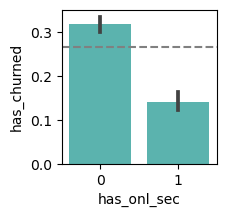


_____________________

has_backup 
_____________________

        chi2  p-value  degrees of freedom
0  18.159802  0.00002                   1

observed:
 has_churned     0     1   All
has_backup                   
0            1826   738  2564
1            1065   308  1373
All          2891  1046  3937

expected:
              0           1
0  1882.784862  681.215138
1  1008.215138  364.784862


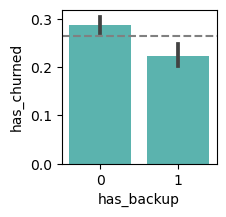


_____________________

has_dev_pro 
_____________________

        chi2   p-value  degrees of freedom
0  13.940381  0.000189                   1

observed:
 has_churned     0     1   All
has_dev_pro                  
0            1830   730  2560
1            1061   316  1377
All          2891  1046  3937

expected:
            0         1
0  1879.8476  680.1524
1  1011.1524  365.8476


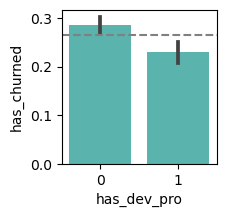


_____________________

has_tech_supp 
_____________________

        chi2       p-value  degrees of freedom
0  99.120066  2.376481e-23                   1

observed:
 has_churned       0     1   All
has_tech_supp                  
0              1929   869  2798
1               962   177  1139
All            2891  1046  3937

expected:
              0           1
0  2054.614681  743.385319
1   836.385319  302.614681


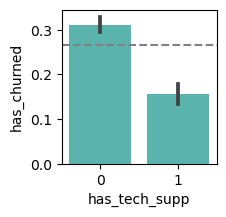


_____________________

has_tv_strm 
_____________________

       chi2   p-value  degrees of freedom
0  5.762552  0.016371                   1

observed:
 has_churned     0     1   All
has_tv_strm                  
0            1807   609  2416
1            1084   437  1521
All          2891  1046  3937

expected:
              0           1
0  1774.106172  641.893828
1  1116.893828  404.106172


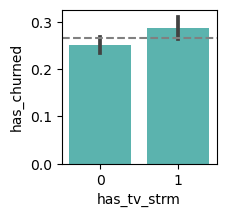


_____________________

has_mv_strm 
_____________________

        chi2   p-value  degrees of freedom
0  10.143344  0.001448                   1

observed:
 has_churned     0     1   All
has_mv_strm                  
0            1803   593  2396
1            1088   453  1541
All          2891  1046  3937

expected:
              0           1
0  1759.419863  636.580137
1  1131.580137  409.419863


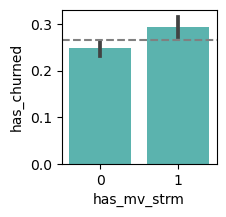


_____________________

has_pprless_bill 
_____________________

         chi2       p-value  degrees of freedom
0  141.364215  1.339372e-32                   1

observed:
 has_churned          0     1   All
has_pprless_bill                  
0                 1347   266  1613
1                 1544   780  2324
All               2891  1046  3937

expected:
              0           1
0  1184.450851  428.549149
1  1706.549149  617.450851


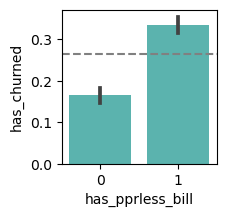


_____________________

payment_bank 
_____________________

       chi2       p-value  degrees of freedom
0  48.14127  3.965907e-12                   1

observed:
 has_churned      0     1   All
payment_bank                  
0             2178   897  3075
1              713   149   862
All           2891  1046  3937

expected:
              0           1
0  2258.020066  816.979934
1   632.979934  229.020066


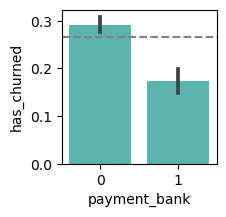


_____________________

payment_card 
_____________________

        chi2       p-value  degrees of freedom
0  63.127916  1.937092e-15                   1

observed:
 has_churned      0     1   All
payment_card                  
0             2141   901  3042
1              750   145   895
All           2891  1046  3937

expected:
              0           1
0  2233.787656  808.212344
1   657.212344  237.787656


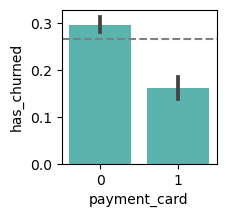


_____________________

payment_e_check 
_____________________

        chi2       p-value  degrees of freedom
0  334.97978  7.910588e-75                   1

observed:
 has_churned         0     1   All
payment_e_check                  
0                2183   465  2648
1                 708   581  1289
All              2891  1046  3937

expected:
              0           1
0  1944.467361  703.532639
1   946.532639  342.467361


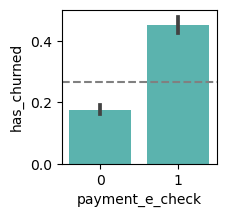


_____________________

payment_m_check 
_____________________

        chi2       p-value  degrees of freedom
0  31.632677  1.862688e-08                   1

observed:
 has_churned         0     1   All
payment_m_check                  
0                2171   875  3046
1                 720   171   891
All              2891  1046  3937

expected:
              0           1
0  2236.724917  809.275083
1   654.275083  236.724917


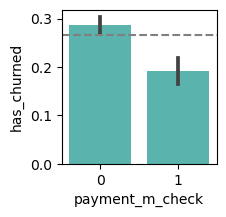


_____________________

internet_dsl 
_____________________

        chi2       p-value  degrees of freedom
0  70.784869  3.983807e-17                   1

observed:
 has_churned      0     1   All
internet_dsl                  
0             1790   799  2589
1             1101   247  1348
All           2891  1046  3937

expected:
              0           1
0  1901.142748  687.857252
1   989.857252  358.142748


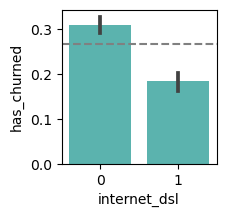


_____________________

internet_fiber 
_____________________

         chi2       p-value  degrees of freedom
0  405.921122  2.831420e-90                   1

observed:
 has_churned        0     1   All
internet_fiber                  
0               1904   311  2215
1                987   735  1722
All             2891  1046  3937

expected:
              0           1
0  1626.508763  588.491237
1  1264.491237  457.508763


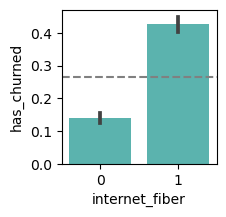


_____________________

internet_none 
_____________________

         chi2       p-value  degrees of freedom
0  208.536477  2.865301e-47                   1

observed:
 has_churned       0     1   All
internet_none                  
0              2088   982  3070
1               803    64   867
All            2891  1046  3937

expected:
              0           1
0  2254.348489  815.651511
1   636.651511  230.348489


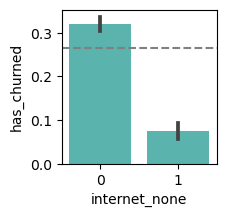


_____________________

contract_m_to_m 
_____________________

         chi2        p-value  degrees of freedom
0  649.133192  3.448459e-143                   1

observed:
 has_churned         0     1   All
contract_m_to_m                  
0                1653   119  1772
1                1238   927  2165
All              2891  1046  3937

expected:
             0          1
0  1301.20701  470.79299
1  1589.79299  575.20701


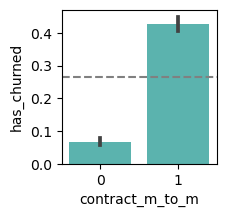


_____________________

contract_one_year 
_____________________

         chi2       p-value  degrees of freedom
0  127.984784  1.131068e-29                   1

observed:
 has_churned           0     1   All
contract_one_year                  
0                  2165   957  3122
1                   726    89   815
All                2891  1046  3937

expected:
              0           1
0  2292.532893  829.467107
1   598.467107  216.532893


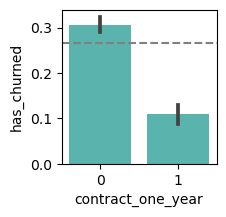


_____________________

contract_two_year 
_____________________

         chi2       p-value  degrees of freedom
0  354.285638  4.941936e-79                   1

observed:
 has_churned           0     1   All
contract_two_year                  
0                  1964  1016  2980
1                   927    30   957
All                2891  1046  3937

expected:
              0           1
0  2188.260097  791.739903
1   702.739903  254.260097


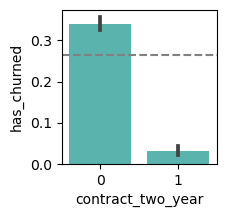


_____________________

auto_bill 
_____________________

         chi2       p-value  degrees of freedom
0  156.421949  6.846414e-36                   1

observed:
 has_churned     0     1   All
auto_bill                    
0            1428   752  2180
1            1463   294  1757
All          2891  1046  3937

expected:
              0           1
0  1600.807722  579.192278
1  1290.192278  466.807722


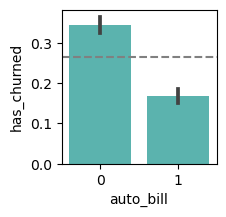


_____________________

fbr_multi_line 
_____________________

         chi2       p-value  degrees of freedom
0  150.087358  1.659072e-34                   1

observed:
 has_churned        0     1   All
fbr_multi_line                  
0               2252   608  2860
1                639   438  1077
All             2891  1046  3937

expected:
             0          1
0  2100.14224  759.85776
1   790.85776  286.14224


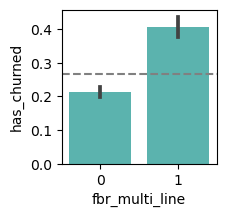


_____________________

tenure 
____________________



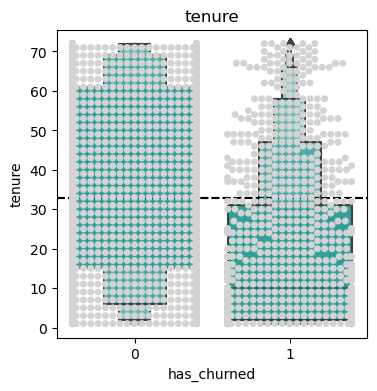

              count       mean        std  min   25%   50%   75%   max
has_churned                                                           
0            2891.0  38.003459  24.177715  1.0  15.0  39.0  61.0  72.0
1            1046.0  18.325048  19.960763  1.0   2.0  10.0  31.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2237485.5, pvalue=1.7462087268198276e-117)

____________________

monthly_charges 
____________________



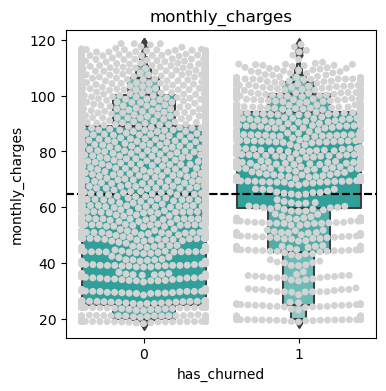

              count       mean        std    min     25%    50%      75%  \
has_churned                                                                
0            2891.0  61.218091  31.349533  18.25  25.000  64.50  89.0250   
1            1046.0  74.719216  24.593969  18.85  59.525  79.85  94.2375   

                max  
has_churned          
0            118.65  
1            118.35   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1140707.5, pvalue=4.601429737222539e-32)

____________________

total_charges 
____________________



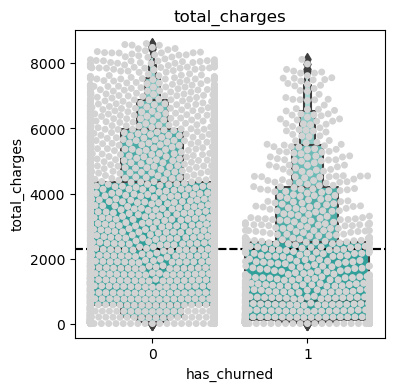

              count         mean          std    min       25%       50%  \
has_churned                                                                
0            2891.0  2583.071792  2343.182641  18.85  574.4250  1718.200   
1            1046.0  1580.769742  1934.641968  18.85  116.5875   699.475   

                  75%     max  
has_churned                    
0            4369.550  8594.4  
1            2514.025  8109.8   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1962317.5, pvalue=2.3468103663029577e-46)

____________________



In [10]:
# Removed has_churned from cat_vars
cat_vars = ['is_male', 'is_senior', 'has_partner', 'has_dependents', 'has_phone', 'has_multi_line', 'has_onl_sec', 'has_backup',
       'has_dev_pro', 'has_tech_supp', 'has_tv_strm', 'has_mv_strm','has_pprless_bill',
       'payment_bank', 'payment_card', 'payment_e_check', 'payment_m_check',
       'internet_dsl', 'internet_fiber', 'internet_none', 'contract_m_to_m',
       'contract_one_year', 'contract_two_year', 'auto_bill',
       'fbr_multi_line']

quant_vars = ['tenure','monthly_charges', 'total_charges']

explore.explore_bivariate(train, 'has_churned', cat_vars, quant_vars)

#### Bivariate Stat Test Takeaways
- Demographic info:
    - gender has little effect on churn
    - `is_senior` is highly correllated with churn despite low number of observations
    - Single individuals and those without dependents have higher rates of churn
- Package info:
    - While having a phone is not correlated with churn, `has_multi_line` is moderately associated with churn
    - Having security 'add ons' such as online security, online backup, device protection, and tech support has an inverse effect on churn
    - Movie and TV streamers are moderately correlated with churn
    - Fiber internet is VERY highly correlated with churn
- Billing info:
    - Paperless billing correlated highly with churn
    - All payment types aside from e-check are inversely correlated with churn
- Month-to-month contracts are extremely correlated to churn
- Fiber internet with multiple lines also very correlated with churn
- Those who churn more likely to have `tenure` less than 30
    - Mean `tenure` for those who have churned is 18
- High monthly charges associated with churn as well
    - Mean monthly charge for churned customers is 74 compared to 61 for not churned
    - Lowest quartile for churned customers more than double that of not churned

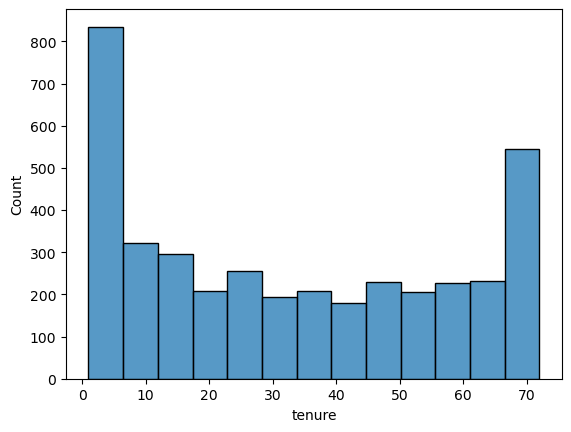

1     351
72    213
2     141
3     112
4     104
     ... 
43     30
51     29
39     29
59     28
36     24
Name: tenure, Length: 72, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


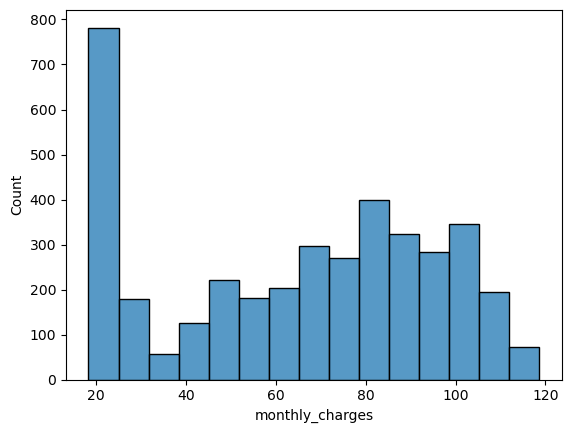

20.05     40
19.95     30
19.65     30
19.90     29
19.85     27
          ..
71.85      1
91.75      1
110.15     1
38.50      1
92.55      1
Name: monthly_charges, Length: 1331, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


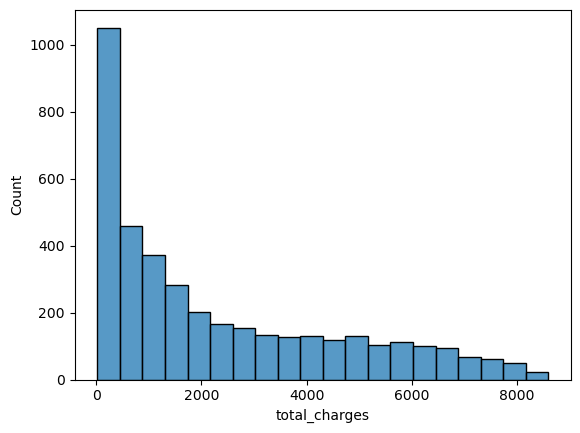

20.20      10
19.90       7
20.05       6
19.75       6
45.30       6
           ..
25.30       1
6065.30     1
1623.40     1
4385.05     1
42.70       1
Name: total_charges, Length: 3748, dtype: int64 AxesSubplot(0.125,0.11;0.775x0.77) None
------------------------------------


In [11]:
# Testing continuous distributions
for col in quant_vars:
    print(train[f'{col}'].value_counts(), sns.histplot(data = train[f'{col}']), plt.show(),
          end = '\n------------------------------------\n')

##### Distribution takeaways:
- None of the variables are disrtibuted normally
- All statistical tests will be non-parametric

## Hypothesis Testing
### Baseline Questions:
- Do fiber customers have lower monthly tenure than other customers?
- Is there a relationship between fiber internet service and e-check payment method?
    - Paperless billing?
- Do month-to-month customers have higher monthly charges than other customers?

In [12]:
# Setting alpha
alpha = .05

### Question 1: Do fiber customers have lower monthly tenure than average customers?
- $H_{0}$: Fiber customers have the same or higher monthly tenure compared to all customers.
- $H_{a}$: Fiber customers have the lower monthly tenure compared to all customers.

In [13]:
fiber = train[train.internet_fiber == 1].tenure
μ = train.tenure.mean()

t, p = stats.wilcoxon(fiber - μ)
t, p/2

(700514.0, 0.022835540230033525)

In [14]:
if p/2 < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject null hypothesis


### Question 2: Is there a relationship between fiber internet service and e-check payment method?
- $H_{0}$: There is no relationship between fiber internet service and e-check.
- $H_{a}$: There is a relationship between fiber internet service and e-check.

In [15]:
observed = pd.crosstab(train.internet_fiber, train.payment_e_check)
observed

payment_e_check,0,1
internet_fiber,,
0,1788,427
1,860,862


In [16]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
expected, p, chi2

(array([[1489.79425959,  725.20574041],
        [1158.20574041,  563.79425959]]),
 2.4166196422613814e-92,
 415.42524656645816)

In [17]:
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject null hypothesis


##### Is there a relationship between fiber internet service and paperless billing?
- $H_{0}$: There is no relationship between fiber internet service and paperless billing.
- $H_{a}$: There is a relationship between fiber internet service and paperless billing.

In [18]:
observed = pd.crosstab(train.internet_fiber, train.has_pprless_bill)
observed

has_pprless_bill,0,1
internet_fiber,,
0,1227,988
1,386,1336


In [19]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
expected, p, chi2

(array([[ 907.49174498, 1307.50825502],
        [ 705.50825502, 1016.49174498]]),
 1.8528726594316296e-96,
 434.3328908781917)

In [20]:
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject null hypothesis


### Question 3: Do month-to-month customers have higher monthly charges than other customers?
- $H_{0}$: Month-to-month customers have equal or lower monthly charges than other customers.
- $H_{a}$: Month-to-month customers have higher monthly charges than other customers.

In [21]:
m2m = train[train.contract_m_to_m == 1].monthly_charges
μ = train.monthly_charges.mean()

t, p = stats.wilcoxon(m2m - μ)
t, p/2

(1099964.0, 0.006418755825656142)

In [22]:
if p/2 < alpha:
    if t > 0:
        print("Reject Null Hypothesis")
    elif t < 0:
        print("Fail to reject Null Hypothesis")
else:
    print("Fail to reject Null Hypthesis")

Reject Null Hypothesis


### Hypothesis Testing Takeaways:
- All of the questions had their $H_{0}$ rejected meaning:
    1. Fiber customers have the lower monthly tenure compared to all customers.
    2. There is a relationship between fiber internet service and e-check.
        -  There is a relationship between fiber internet service and paperless billing.
    3. Month-to-month customers have higher monthly charges than other customers.

# Modeling
- Establish a baseline model to compare other models to
- Create a combination of features to feed models
- Train three different classification models
    1. kNN
    2. Decision Tree
    3. Random Forrest
- Compare each models accuracy to baseline accuracy
- Compare model accuracy for in-set to out-of-set accuracy

In [23]:
# Creating a list of tuples containing possible combinations of categorical features

# import itertools

# features = [col for col in train.columns if train[f'{col}'].nunique() <= 2] #Filters out any continuos vars
            
# possible_combinations = []
            
# for i in range(2, len(features) + 1):
#     possible_combinations.extend(list(itertools.combinations(features, i)))

# possible_combinations[0:5]

In [24]:
# Establish baseline model, we know that only 26% have churned so we will set the baseline
# to predict for not churned

unclean_telco['baseline'] = 'No'
unclean_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,baseline
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,Yes,Yes,No,2,Yes,2,65.6,593.3,No,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,Yes,1,No,2,59.9,542.4,No,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,No,No,No,1,Yes,1,73.9,280.85,Yes,No
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,No
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes,No


In [33]:
baseline = (unclean_telco.churn == unclean_telco.baseline).mean()
f'Baseline accuracy: {(unclean_telco.churn == unclean_telco.baseline).mean():.2%}'

'Baseline accuracy: 73.46%'

In [27]:
# Setting X and y for each dataset
X_train, y_train = train.drop(columns='has_churned'), train.has_churned
X_validate, y_validate = validate.drop(columns='has_churned'), validate.has_churned
X_test, y_test = test.drop(columns='has_churned'), test.has_churned

### Decision Tree

In [44]:
clf = DecisionTreeClassifier(max_depth=5, random_state=123)
clf = clf.fit(X_train, y_train)

In [45]:
# dot_data = export_graphviz(clf, feature_names= X_train.columns,class_names=['died','lived'], rounded=True, filled=True, out_file=None)
# graph = graphviz.Source(dot_data) 

# graph.render('titanic_decision_tree', view=True)

In [46]:
y_pred = clf.predict(X_train)
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.9701897 , 0.0298103 ],
       [0.9701897 , 0.0298103 ],
       [0.92083333, 0.07916667],
       [0.58823529, 0.41176471],
       [0.9701897 , 0.0298103 ]])

#### Evaluate:

In [50]:
tscore = clf.score(X_train, y_train)
vscore = clf.score(X_validate, y_validate)

report = classification_report(y_train, y_pred, output_dict=True)
print(clf)
print(pd.DataFrame(report))
print(f"Tree with max depth of 5")
print(f'Accuracy of decision tree classifier on train set: {tscore:.2%}\nAccuracy of random forest classifier on train set: {vscore:.2%}')
print()

dt_diff = tscore - vscore

if (baseline > tscore):
    print('The model preformed worse on train accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
elif (baseline > vscore):
    print('The model preformed worse on validate accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
else:
    print(f'The model preformed {tscore - baseline:.2%} better than baseline on train data')
    print(f'The model preformed {vscore - baseline:.2%} better than baseline on train data')
    
print(f'The difference in preformance on train data and validate data is {dt_diff:.2%}')

DecisionTreeClassifier(max_depth=5, random_state=123)
                     0            1  accuracy    macro avg  weighted avg
precision     0.811654     0.753247  0.803658     0.782450      0.796136
recall        0.953995     0.388145  0.803658     0.671070      0.803658
f1-score      0.877087     0.512303  0.803658     0.694695      0.780169
support    2891.000000  1046.000000  0.803658  3937.000000   3937.000000
Tree with max depth of 5
Accuracy of decision tree classifier on train set: 80.37%
Accuracy of random forest classifier on train set: 77.13%

The model preformed 6.90% better than baseline on train data
The model preformed 3.67% better than baseline on train data
The difference in preformance on train data and validate data is 3.23%


In [48]:
confusion = confusion_matrix(y_train, y_pred)
con_df = pd.DataFrame(confusion_matrix(y_train, y_pred))
con_df.rename(columns = {0: 'not_churned', 1: 'churned'}, index = {0: 'not_churned', 1: 'churned'})

,not_churned,churned
not_churned,2758,133
churned,640,406


In [49]:
TP = confusion[0,0]
TN = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]

AR = (TP+TN)/(TP+FP+FN+TN)
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
TNR = TN/(TN+FP)
FNR = FN/(FN+TP)

print(f'Accuracy: {AR:.2%}\nTrue Positive Rate: {TPR:.2%}\nFalse Positive Rate: {FPR:.2%}\nTrue Negaitve Rate: {TNR:.2%}\nFalse Negative Rate: {FNR:.2%}')

Accuracy: 80.37%
True Positive Rate: 81.17%
False Positive Rate: 24.68%
True Negaitve Rate: 75.32%
False Negative Rate: 18.83%


### Random Forrest

In [28]:
rfc = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=123)

In [29]:
for i in range(0, len(list(X_train.columns))):
    print(X_train.columns[i], rfc.feature_importances_[i])

is_male 0.01512643624951772
is_senior 0.015036635445884074
has_partner 0.014122433261682731
has_dependents 0.012266629606317591
tenure 0.15169463147915901
has_phone 0.005972876778020041
has_multi_line 0.009297419002707164
has_onl_sec 0.026563286183547922
has_backup 0.014262134003443195
has_dev_pro 0.011441737799306725
has_tech_supp 0.019554763584860503
has_tv_strm 0.01160938693450329
has_mv_strm 0.012123366858087155
has_pprless_bill 0.02000727198882627
monthly_charges 0.12894845618738737
total_charges 0.16028482511245307
payment_bank 0.006753861103817676
payment_card 0.009041920542555345
payment_e_check 0.04109696270480221
payment_m_check 0.007473246024231602
internet_dsl 0.01722328467488125
internet_fiber 0.05837842566674416
internet_none 0.028846295958441282
contract_m_to_m 0.11227024211963987
contract_one_year 0.015439720809595542
contract_two_year 0.04278203115741107
auto_bill 0.01324192823498131
fbr_multi_line 0.019139790527194948


In [30]:
y_pred = rfc.predict(X_train)
y_pred_proba = rfc.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.90806664, 0.09193336],
       [0.90543108, 0.09456892],
       [0.97368544, 0.02631456],
       [0.77119269, 0.22880731],
       [0.97526057, 0.02473943]])

#### Evaluate:

In [51]:
tscore = rfc.score(X_train, y_train)
vscore = rfc.score(X_validate, y_validate)

report = classification_report(y_train, y_pred, output_dict=True)
print(rfc)
print(pd.DataFrame(report))
print(f"Forrest with max depth of 10 and minimum leaf samples 2")
print(f'Accuracy of random forest classifier on train set: {tscore:.2%}\nAccuracy of random forest classifier on train set: {vscore:.2%}')
print()

rf_diff = tscore - vscore

if (baseline > tscore):
    print('The model preformed worse on train accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
elif (baseline > vscore):
    print('The model preformed worse on validate accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
else:
    print(f'The model preformed {tscore - baseline:.2%} better than baseline on train data')
    print(f'The model preformed {vscore - baseline:.2%} better than baseline on train data')
    
print(f'The difference in preformance on train data and validate data is {rf_diff:.2%}')

RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=123)
                     0            1  accuracy    macro avg  weighted avg
precision     0.811654     0.753247  0.803658     0.782450      0.796136
recall        0.953995     0.388145  0.803658     0.671070      0.803658
f1-score      0.877087     0.512303  0.803658     0.694695      0.780169
support    2891.000000  1046.000000  0.803658  3937.000000   3937.000000
Forrest with max depth of 10 and minimum leaf samples 2
Accuracy of random forest classifier on train set: 87.88%
Accuracy of random forest classifier on train set: 78.61%

The model preformed 14.42% better than baseline on train data
The model preformed 5.15% better than baseline on train data
The difference in preformance on train data and validate data is 9.27%


In [37]:
confusion1 = confusion_matrix(y_train, y_pred)
con_df1 = pd.DataFrame(confusion_matrix(y_train, y_pred))
con_df1.rename(columns = {0: 'not_churned', 1: 'churned'}, index = {0: 'not_churned', 1: 'churned'})

,not_churned,churned
not_churned,2735,156
churned,321,725


In [38]:
TP = confusion1[0,0]
TN = confusion1[1,1]
FP = confusion1[0,1]
FN = confusion1[1,0]

AR = (TP+TN)/(TP+FP+FN+TN)
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
TNR = TN/(TN+FP)
FNR = FN/(FN+TP)

print(f'Accuracy: {AR:.2%}\nTrue Positive Rate: {TPR:.2%}\nFalse Positive Rate: {FPR:.2%}\nTrue Negaitve Rate: {TNR:.2%}\nFalse Negative Rate: {FNR:.2%}')

Accuracy: 87.88%
True Positive Rate: 89.50%
False Positive Rate: 17.71%
True Negaitve Rate: 82.29%
False Negative Rate: 10.50%


### kNN

In [39]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba[0:5]

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2]])

#### Evaluate:

In [52]:
tscore = knn.score(X_train, y_train)
vscore = knn.score(X_validate, y_validate)

report = classification_report(y_train, y_pred, output_dict=True)
print(knn)
print(pd.DataFrame(report))
print(f"K Nearest Neighbor with n_neighbors set to 5")
print(f'Accuracy of K Nearest Neighbor classifier on train set: {tscore:.2%}\nAccuracy of random forest classifier on train set: {vscore:.2%}')
print()

knn_diff = tscore - vscore

if (baseline > tscore):
    print('The model preformed worse on train accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
elif (baseline > vscore):
    print('The model preformed worse on validate accuracy than the baseline model')
    print(f'{baseline:.2%} > {tscore:.2%}')
else:
    print(f'The model preformed {tscore - baseline:.2%} better than baseline on train data')
    print(f'The model preformed {vscore - baseline:.2%} better than baseline on train data')
    
print(f'The difference in preformance on train data and validate data is {knn_diff:.2%}')

KNeighborsClassifier()
                     0            1  accuracy    macro avg  weighted avg
precision     0.811654     0.753247  0.803658     0.782450      0.796136
recall        0.953995     0.388145  0.803658     0.671070      0.803658
f1-score      0.877087     0.512303  0.803658     0.694695      0.780169
support    2891.000000  1046.000000  0.803658  3937.000000   3937.000000
K Nearest Neighbor with n_neighbors set to 5
Accuracy of K Nearest Neighbor classifier on train set: 83.08%
Accuracy of random forest classifier on train set: 75.89%

The model preformed 9.62% better than baseline on train data
The model preformed 2.43% better than baseline on train data
The difference in preformance on train data and validate data is 7.19%


In [42]:
confusion2 = confusion_matrix(y_train, y_pred)
con_df2 = pd.DataFrame(confusion_matrix(y_train, y_pred))
con_df2.rename(columns = {0: 'not_churned', 1: 'churned'}, index = {0: 'not_churned', 1: 'churned'})

,not_churned,churned
not_churned,2665,226
churned,440,606


In [43]:
TP = confusion2[0,0]
TN = confusion2[1,1]
FP = confusion2[0,1]
FN = confusion2[1,0]

AR = (TP+TN)/(TP+FP+FN+TN)
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
TNR = TN/(TN+FP)
FNR = FN/(FN+TP)

print(f'Accuracy: {AR:.2%}\nTrue Positive Rate: {TPR:.2%}\nFalse Positive Rate: {FPR:.2%}\nTrue Negaitve Rate: {TNR:.2%}\nFalse Negative Rate: {FNR:.2%}')

Accuracy: 83.08%
True Positive Rate: 85.83%
False Positive Rate: 27.16%
True Negaitve Rate: 72.84%
False Negative Rate: 14.17%


In [55]:
if (dt_diff < rf_diff) & (dt_diff < knn_diff):
    print(f'The best preforming model is the Decision Tree classifier with a difference in preformance of {dt_diff:.2%}')
elif (rf_diff < dt_diff) & (rf_diff < knn_diff):
    print(f'The best preforming model is the Random Forrest classifier with a difference in preformance of {rf_diff:.2%}')
elif (knn_diff < rf_diff) & (knn_diff < dt_diff):
    print(f'The best preforming model is the K Nearest Neighbor classifier with a difference in preformance of {knn_diff:.2%}')

The best preforming model is the Decision Tree classifier with a difference in preformance of 3.23%


## Testing on Test

In [57]:
print('Accuracy of Decision Tree classifier on test set: {:.2%}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 79.46%
